In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.coordinates as coord
from astropy.table import Table
from astropy.io import fits
# import astropy.units as u

# import gala.coordinates as gc

In [2]:
plt.style.use('si_lgray_ucondensed')

In [3]:
t = Table(fits.getdata('../data/legacysurvey-bricks-dr7.fits.gz'))

In [4]:
ind = (t['ra']>215) & (t['ra']<250) & (t['dec']>-10) & (t['dec']<10)
t = t[ind]

In [23]:
tp = Table(fits.getdata('../data/pal5_ls_lite_grz.fits'))

In [24]:
tflag = Table.read('../data/cmd_masks_orig.fits')

In [25]:
tp = tp[tflag['gr_mask'] & tflag['grz_mask']]

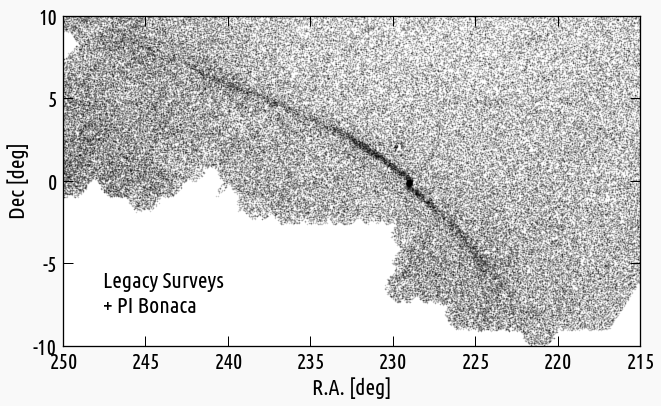

In [26]:
plt.figure(figsize=(10,6))

# im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_g'], 
#                 s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
plt.plot(tp['ra'], tp['dec'], 'k.', ms=1, alpha=0.2)

plt.text(0.07, 0.1, 'Legacy Surveys\n+ PI Bonaca', transform=plt.gca().transAxes)

plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
plt.gca().set_aspect('equal')
plt.xlim(250,215)
plt.ylim(-10,10)

plt.tight_layout()
plt.savefig('../plots/pal5.png', dpi=200)

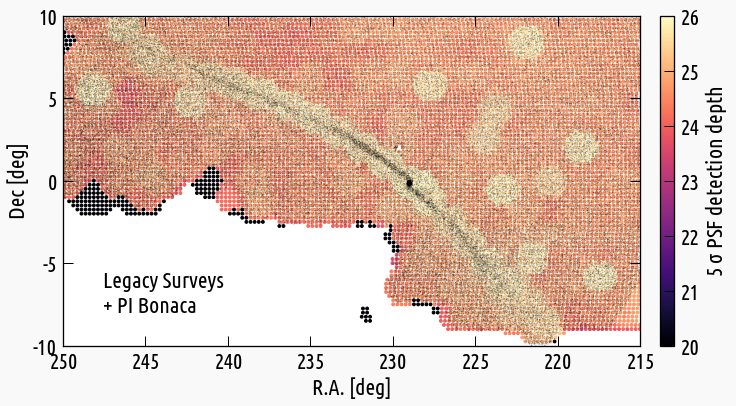

In [36]:
fig = plt.figure(figsize=(10,6))

im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_g'], 
                s=8, vmin=20, vmax=26, cmap='magma', rasterized=True)
plt.plot(tp['ra'], tp['dec'], 'k.', ms=0.5, alpha=0.2)

plt.text(0.07, 0.1, 'Legacy Surveys\n+ PI Bonaca', transform=plt.gca().transAxes)

plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')
plt.gca().set_aspect('equal')
plt.xlim(250,215)
plt.ylim(-10,10)

plt.tight_layout()

[[x00,y10],[x11,y01]] = plt.gca().get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth');

plt.savefig('../plots/pal5_depth.png', dpi=200)

In [ ]:
fig, ax = plt.subplots(3,2,figsize=(13,11.5), sharex=True, sharey=True)

for e, b in enumerate(['g', 'r', 'z']):
    plt.sca(ax[e][0])
    
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.xlim(250, 215)
    plt.ylim(-10, 10)
    plt.ylabel('Dec [deg]')
    plt.gca().set_aspect('equal')
    
    plt.sca(ax[e][1])
    im = plt.scatter(t['ra'], t['dec'], c=t['psfdepth_{:1s}'.format(b)], 
                s=3, vmin=20, vmax=26, cmap='magma', rasterized=True)
    plt.plot(tp['ra'], tp['dec'], 'k.', ms=0.5, alpha=0.1)

plt.xlabel('R.A. [deg]')
plt.sca(ax[2,0])
plt.xlabel('R.A. [deg]')
plt.tight_layout(h_pad=0.1)

[[x00,y00],[x01,y01]] = ax[0,1].get_position().get_points()
[[x10,y10],[x11,y11]] = ax[2,1].get_position().get_points()
pad = 0.01; width = 0.02
cbar_ax = fig.add_axes([x11+pad, y10, width, y01-y10])
plt.colorbar(im, cax=cbar_ax)
plt.ylabel('5 $\sigma$ PSF detection depth')


plt.savefig('../plots/ls_brick_depth_26.png', dpi=200)